In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from pathlib import Path
import seaborn as sns
import pandas as pd

In [2]:
from matplotlib import rc
rc('text', usetex=True)
rc('font', serif='Times')

In [3]:
name = ''
name += '_cpc'
name += '_alexnet'
name += f'_{"1"}'

In [4]:
def readSimilarity(fn, column_name):
    
    val = []
    minimum = np.inf
    
    with open(fn, 'r') as file:
        csvreader = csv.reader(file)
        for n, row in enumerate(csvreader):
            if n == 0:
                ind = np.where(np.asarray(row) == column_name)[0][0]
            else:
                val.append(float(row[ind]))
                if float(row[ind]) < minimum: minimum = float(row[ind])
    print(minimum)
    return val

In [5]:
palette = {}
data = []

In [6]:
# seen matched
label_name = r'A: Familiar audio -- familiar image'
palette[label_name] = 'tab:red'
seen_matched = readSimilarity(Path(f'familiar_analysis{name}.csv'), 'similarity_A')
data = [[label_name, v] for v in seen_matched]

-7.328879356384277


In [7]:
# seen mismatched
label_name = r'B: Familiar audio -- familiar$^*$ image'
palette[label_name] = 'tab:red'
seen_mismatched = readSimilarity(Path(f'familiar_mismatched_analysis{name}.csv'), 'similarity_A')
data.extend([[label_name, v] for v in seen_mismatched])

-15.180459976196289


In [8]:
# unseen->unseen
label_name = r'C: Novel audio -- novel image'
palette[label_name] = 'tab:green'
unseen_to_unseen = readSimilarity(Path(f'me_analysis{name}.csv'), 'similarity_A')
data.extend([[label_name, v] for v in unseen_to_unseen])
mismatched_unseen_to_unseen = readSimilarity(Path(f'me_mismatched_analysis{name}.csv'), 'similarity_A')
data.extend([[label_name, v] for v in mismatched_unseen_to_unseen])

-13.470518112182617
-12.547093391418457


In [9]:
# unseen->seen
label_name = r'D: Novel audio -- familiar image'
palette[label_name] = 'tab:green'
unseen_to_seen = readSimilarity(Path(f'me_analysis{name}.csv'), 'similarity_B')
data.extend([[label_name, v]  for v in unseen_to_seen])
mismatched_unseen_to_seen = readSimilarity(Path(f'me_mismatched_analysis{name}.csv'), 'similarity_B')
data.extend([[label_name, v] for v in mismatched_unseen_to_seen])

-30.77914810180664
-30.77914810180664


In [10]:
df = pd.DataFrame(data, columns=["label", "Similarity score"]
)
df["Similarity score"] += 30.77914810180664

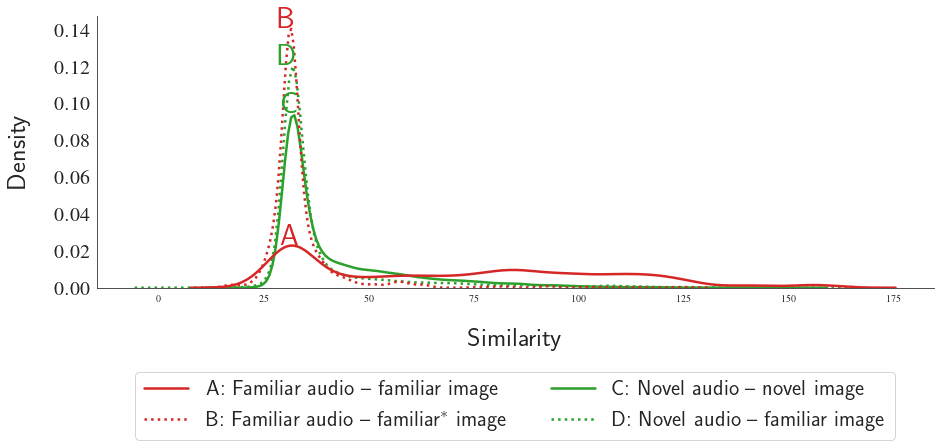

In [11]:
fig = plt.figure(figsize=(15, 5))
sns.set_style(style='white')
f = sns.kdeplot(
    df, x="Similarity score", hue="label", common_norm=False, legend=True, linewidth=2.5, 
    palette=palette, log_scale=False,
)

lss = [':', '-', ':', '-']

handles = f.legend_.legendHandles[::-1]

for line, ls, handle in zip(f.lines, lss, handles):
    line.set_linestyle(ls)
    handle.set_ls(ls)
    
subs = f.lines
nums = ['D', 'C', 'B', 'A']
for i in range(len(subs)):
    x = subs[i].get_xdata() 
    y = subs[i].get_ydata() 
    c = subs[i].get_color()
    maxid = np.argmax(y) 
    
    plt.annotate(f'{nums[i]}', (x[maxid]-1, y[maxid]+0.0005), c=c, fontsize=30, ha='center', annotation_clip=False)

sns.move_legend(f, "lower center", ncol=2, bbox_to_anchor=(0.5, -0.6), title='', frameon=True, fontsize=22)
# start = -10
# end = 100
# plt.xlim(start, end)
# xs = []
# for i in range(start, end+10, 10):
#     xs.append(i)
# # xs = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
# plt.xticks(xs, fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Density', fontsize=26, labelpad=24)
plt.xlabel('Similarity', fontsize=26, labelpad=24)
axes = plt.gca()
axes.spines[['top', 'right']].set_visible(False) 
plt.savefig(f'similarity_densities{name}.pdf',bbox_inches='tight')